**INTRODUCTION**:

This kernel is a search and amalgamation of various visualizations which will be done on csv files. The visuals are from plotly. additionally thereto , it also has valuable insights on the standard of food we eat and nutrients that it carries.



**CONTEXT: FOOD & NUTRITION**
              Nutrition inside the food are the way we get fuel, providing energy for our bodies. we'd like to exchange nutrients in our bodies with a replacement supply a day . Fats, proteins, and carbohydrates are all required. Nutrition is that the science that interprets the nutrients and other substances in food in reference to maintenance, growth, reproduction, health and disease of an organism. It includes ingestion, absorption, assimilation, biosynthesis, catabolism and excretion.

Counting calories and reducing fat intake is that the favorite advice given by all dieticians and nutritionist. The knowledge about nutrition is important part to stay eating mindfully and also peace of mind. Furthermore, a diet crammed with vegetables, fruits and whole grains could help prevent major conditions like stroke, diabetes and heart condition .

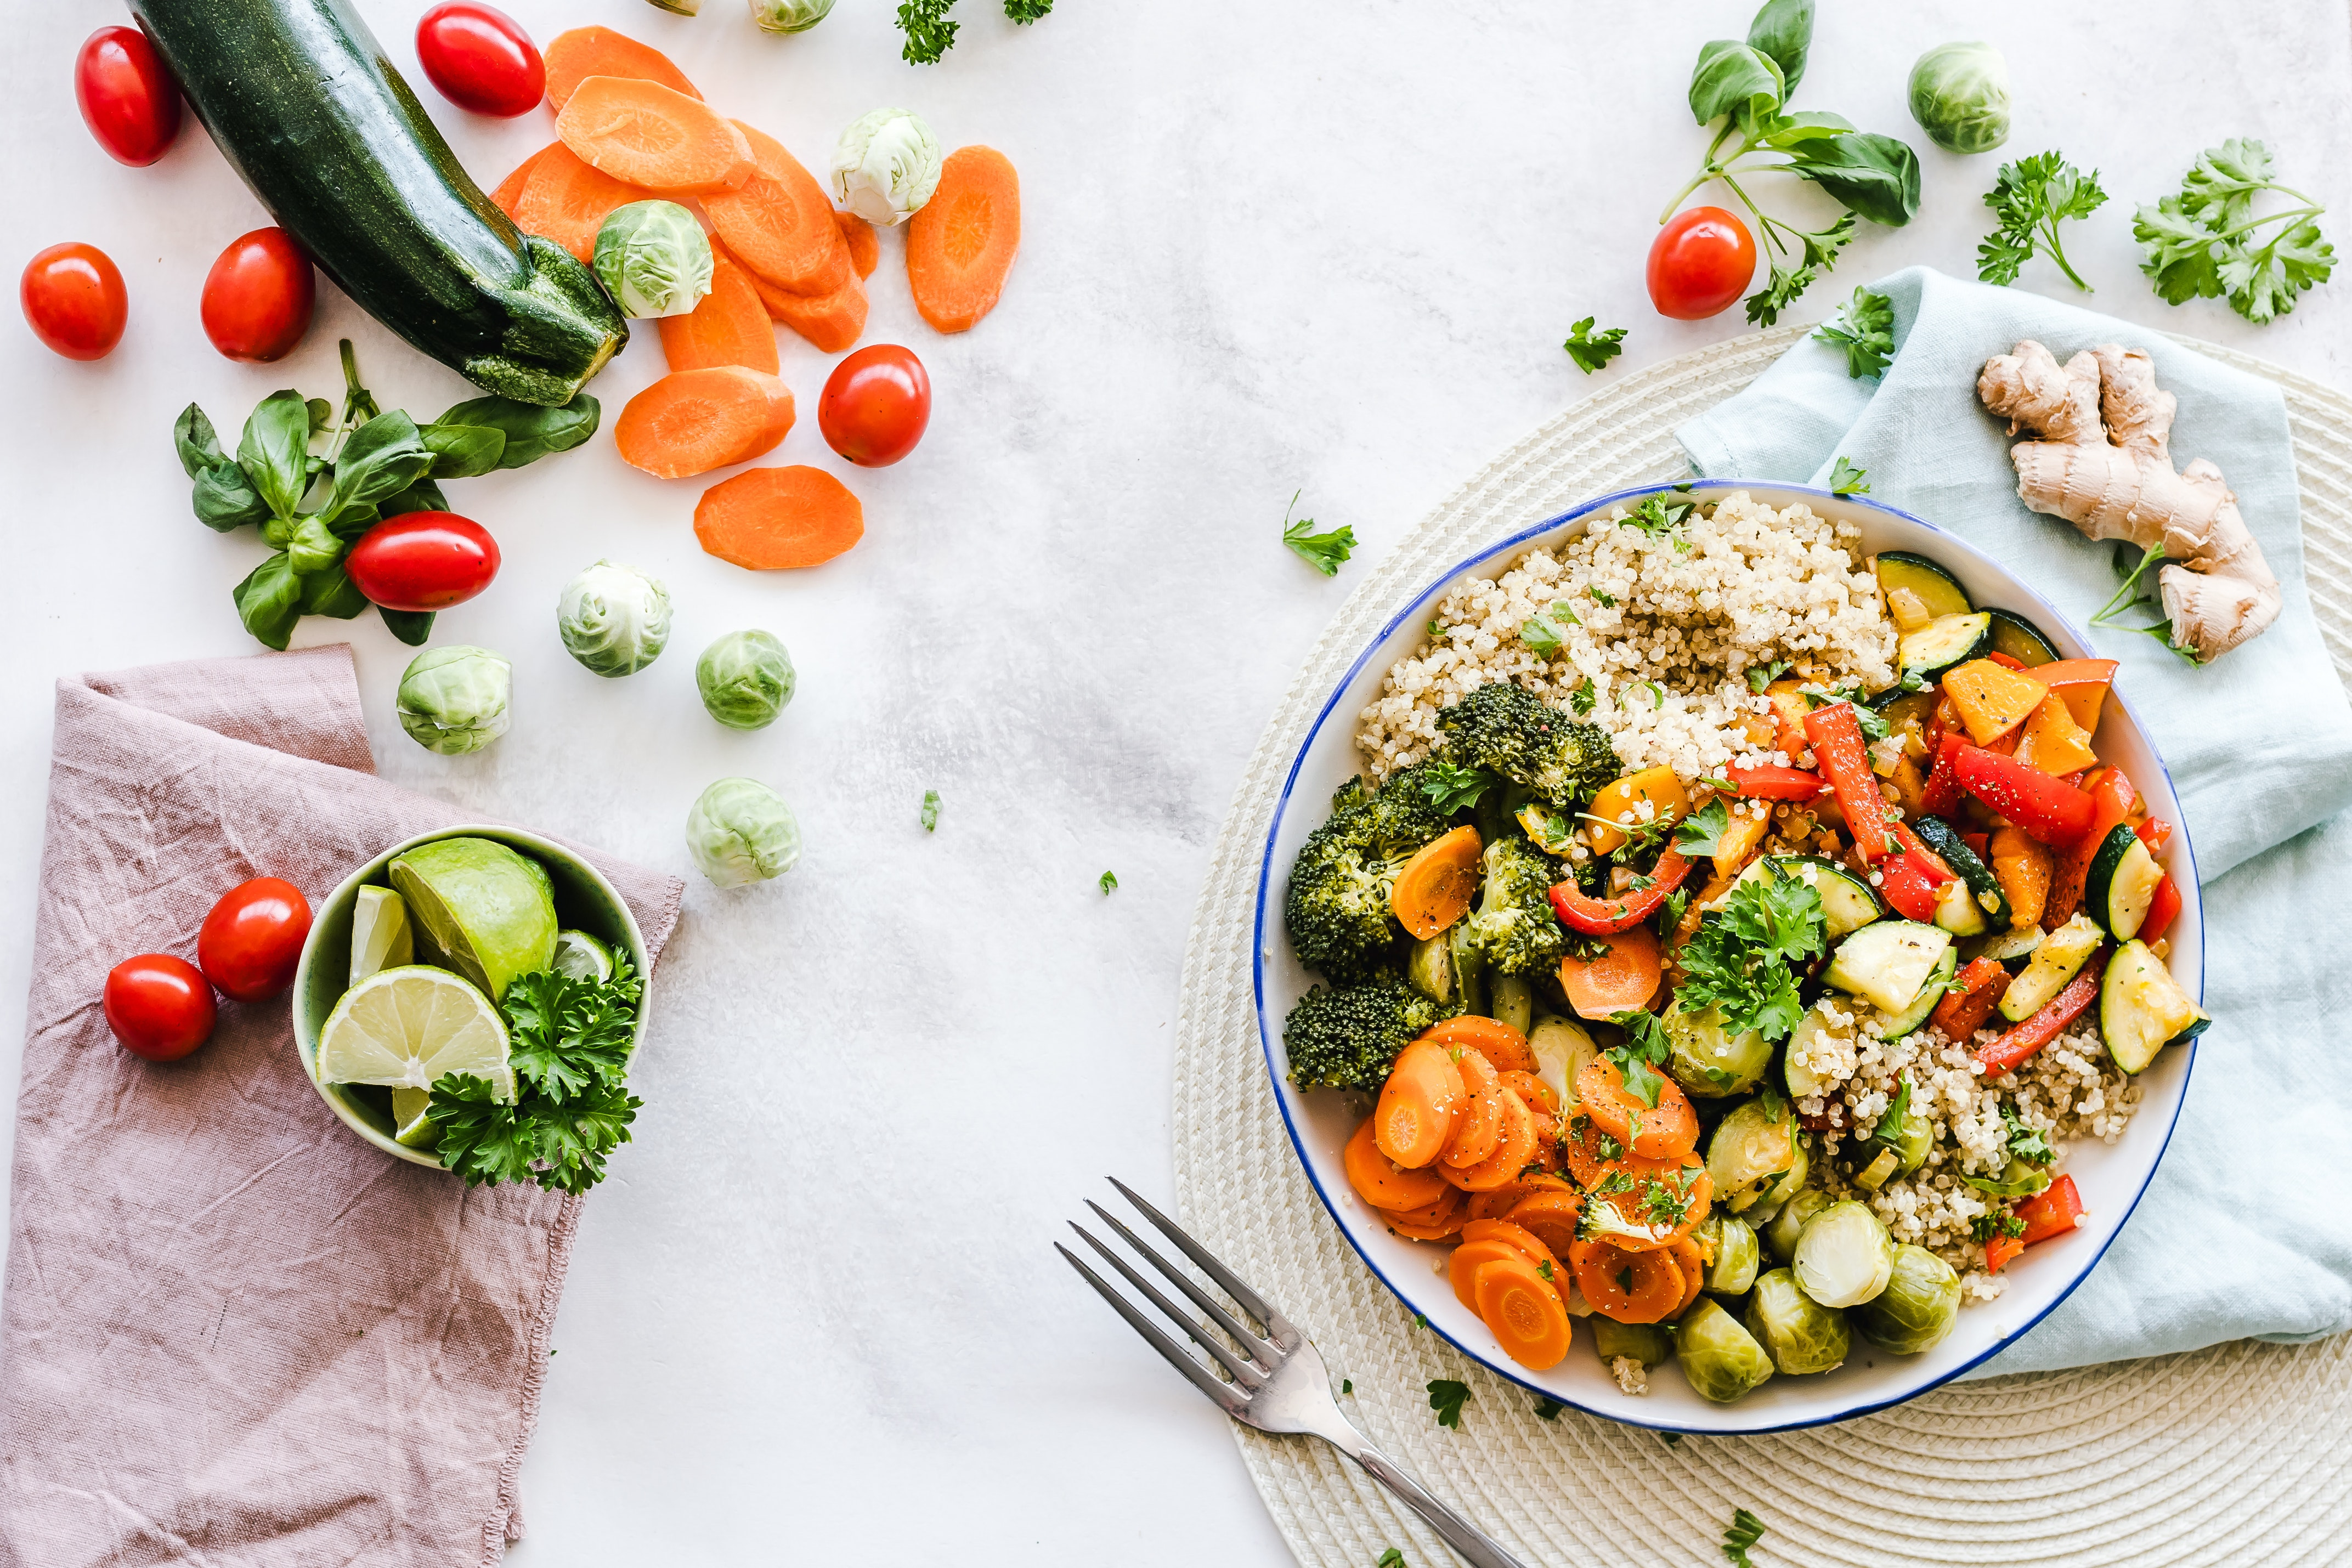

In [ ]:
#import libraries 
import pandas as pd

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [ ]:
#loading data set
from google.colab import files
uploaded = files.upload()

Saving nutrients_csvfile.csv to nutrients_csvfile.csv


In [ ]:
nutrients=pd.read_csv("nutrients_csvfile.csv")
nutrients.head()

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
0,Cows' milk,1 qt.,976,660,32,40,36,0,48,Dairy products
1,Milk skim,1 qt.,984,360,36,t,t,0,52,Dairy products
2,Buttermilk,1 cup,246,127,9,5,4,0,13,Dairy products
3,"Evaporated, undiluted",1 cup,252,345,16,20,18,0,24,Dairy products
4,Fortified milk,6 cups,"1,419","1,373",89,42,23,1.4,119,Dairy products


** Data Cleaning:**

Although the info here seems clean, some minor alteration are required. There are 3 concern during this step.

**Convert**
"t" and "t'" value into 0. Since the dataset has "t" and "t'" value that indicates miniscule amount nutrients inside the food, ignore them into 0
Commas to numerical data


**nutrients** datatypes into int or float variable
"-1" and "a" value into 0

**Deletes** food with incomplete data/null value
Checking food category distribution

In [ ]:
#replace t in the data by 0. t indicates miniscule amount inside the food item
nutrients = nutrients.replace("t", 0)
nutrients = nutrients.replace("t'", 0)

nutrients.head()

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
0,Cows' milk,1 qt.,976,660,32,40,36,0,48,Dairy products
1,Milk skim,1 qt.,984,360,36,0,0,0,52,Dairy products
2,Buttermilk,1 cup,246,127,9,5,4,0,13,Dairy products
3,"Evaporated, undiluted",1 cup,252,345,16,20,18,0,24,Dairy products
4,Fortified milk,6 cups,"1,419","1,373",89,42,23,1.4,119,Dairy products


In [ ]:
#check the size of dataset
display(nutrients)

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
0,Cows' milk,1 qt.,976,660,32,40,36,0,48,Dairy products
1,Milk skim,1 qt.,984,360,36,0,0,0,52,Dairy products
2,Buttermilk,1 cup,246,127,9,5,4,0,13,Dairy products
3,"Evaporated, undiluted",1 cup,252,345,16,20,18,0,24,Dairy products
4,Fortified milk,6 cups,"1,419","1,373",89,42,23,1.4,119,Dairy products
...,...,...,...,...,...,...,...,...,...,...
330,Fruit-flavored soda,12 oz.,346,161,0,0,0,0,42,"Drinks,Alcohol, Beverages"
331,Ginger ale,12 oz.,346,105,0,0,0,0,28,"Drinks,Alcohol, Beverages"
332,Root beer,12 oz.,346,140,0,0,0,0,35,"Drinks,Alcohol, Beverages"
333,Coffee,1 cup,230,3,0,0,0,0,1,"Drinks,Alcohol, Beverages"


In [ ]:
#convert commas to numerical data for respective int or float variable
nutrients = nutrients.replace(",","", regex=True)
nutrients['Protein'] = nutrients['Protein'].replace("-1","", regex=True)
nutrients['Fiber'] = nutrients['Fiber'].replace("a","", regex=True)
nutrients['Calories'][91] = (8+44)/2

#convert grams, calories, protein, fat, saturated fat, fiber and carbs datatypes to int
nutrients['Grams'] = pd.to_numeric(nutrients['Grams'])
nutrients['Calories'] = pd.to_numeric(nutrients['Calories'])
nutrients['Protein'] = pd.to_numeric(nutrients['Protein'])
nutrients['Fat'] = pd.to_numeric(nutrients['Fat'])
nutrients['Sat.Fat'] = pd.to_numeric(nutrients['Sat.Fat'])
nutrients['Fiber'] = pd.to_numeric(nutrients['Fiber'])
nutrients['Carbs'] = pd.to_numeric(nutrients['Carbs'])

#check the result of dataset
nutrients.dtypes

Food         object
Measure      object
Grams         int64
Calories    float64
Protein     float64
Fat           int64
Sat.Fat     float64
Fiber       float64
Carbs       float64
Category     object
dtype: object

In [ ]:
#quick check data quality
print(nutrients.isnull().any())
print('-'*245)
print(nutrients.describe())
print('-'*245)

Food        False
Measure     False
Grams       False
Calories     True
Protein      True
Fat         False
Sat.Fat      True
Fiber        True
Carbs       False
Category    False
dtype: bool
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
             Grams     Calories     Protein  ...     Sat.Fat       Fiber       Carbs
count   335.000000   334.000000  334.000000  ...  333.000000  334.000000  335.000000
mean    143.211940   188.802395    8.601796  ...    6.438438    2.376078   24.982388
std     138.668626   184.453018   17.752557  ...   18.517656   16.078272   35.833106
min      11.000000     0.000000    0.000000  ...    0.000000    0.000000    0.000000
25%      60.000000    75.000000    1.000000  ...    0.000000    0.000000    3.000000
50%     108.000000   131.000000    3.000000  ...    

In [ ]:
#drop row in with null value
nutrients = nutrients.dropna()

display(nutrients)

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
0,Cows' milk,1 qt.,976,660.0,32.0,40,36.0,0.0,48.0,Dairy products
1,Milk skim,1 qt.,984,360.0,36.0,0,0.0,0.0,52.0,Dairy products
2,Buttermilk,1 cup,246,127.0,9.0,5,4.0,0.0,13.0,Dairy products
3,Evaporated undiluted,1 cup,252,345.0,16.0,20,18.0,0.0,24.0,Dairy products
4,Fortified milk,6 cups,1419,1373.0,89.0,42,23.0,1.4,119.0,Dairy products
...,...,...,...,...,...,...,...,...,...,...
330,Fruit-flavored soda,12 oz.,346,161.0,0.0,0,0.0,0.0,42.0,DrinksAlcohol Beverages
331,Ginger ale,12 oz.,346,105.0,0.0,0,0.0,0.0,28.0,DrinksAlcohol Beverages
332,Root beer,12 oz.,346,140.0,0.0,0,0.0,0.0,35.0,DrinksAlcohol Beverages
333,Coffee,1 cup,230,3.0,0.0,0,0.0,0.0,1.0,DrinksAlcohol Beverages


In [ ]:
#Simplifying Categories
nutrients['Category'] = nutrients['Category'].replace('DrinksAlcohol Beverages', 'Drinks, Alcohol, Beverages', regex=True)
nutrients['Category'] = nutrients['Category'].replace('Fats Oils Shortenings', 'Fats, Oils, Shortenings', regex=True)
nutrients['Category'] = nutrients['Category'].replace('Fish Seafood', 'Fish, Seafood', regex=True)
nutrients['Category'] = nutrients['Category'].replace('Meat Poultry', 'Meat, Poultry', regex=True)
nutrients['Category'] = nutrients['Category'].replace(['Breads cereals fastfoodgrains', 'Seeds and Nuts'], 'Grains', regex=True)
nutrients['Category'] = nutrients['Category'].replace(['Desserts sweets', 'Jams Jellies'], 'Desserts', regex=True)
nutrients['Category'] = nutrients['Category'].replace(['Fruits A-F', 'Fruits G-P', 'Fruits R-Z'], 'Fruits', regex=True)
nutrients['Category'] = nutrients['Category'].replace(['Vegetables A-E', 'Vegetables F-P', 'Vegetables R-Z'], 'Vegetables', regex=True)

In [ ]:
#Convert grams, calories, protein, fat, saturated fat, fiber and carbs value into per grams
nutrients['Calories'] = nutrients['Calories'] / nutrients['Grams']
nutrients['Protein'] = nutrients['Protein'] / nutrients['Grams']
nutrients['Fat'] = nutrients['Fat'] / nutrients['Grams']
nutrients['Sat.Fat'] = nutrients['Sat.Fat'] / nutrients['Grams']
nutrients['Fiber'] = nutrients['Fiber'] / nutrients['Grams']
nutrients['Carbs'] = nutrients['Carbs'] / nutrients['Grams']

In [ ]:
#Final Checking Categories Distribution
category_dist = nutrients.groupby(['Category']).mean()
category_dist

,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs
Category,,,,,,,
Dairy products,264.714286,2.062635,0.121218,0.129809,0.109908,0.000898,0.100328
Desserts,91.351351,2.799566,0.023544,0.052981,0.045238,0.014114,0.566593
"Drinks, Alcohol, Beverages",273.666667,0.564567,0.000000,0.000000,0.000000,0.000000,0.046277
"Fats, Oils, Shortenings",49.642857,6.129760,0.158013,0.818925,0.536513,0.149235,0.164796
"Fish, Seafood",100.388889,1.563598,0.269156,0.118528,0.067499,0.056763,0.072411
Fruits,193.603448,0.869978,0.007850,0.009338,0.007486,0.008396,0.208111
Grains,104.122807,3.562414,0.107320,0.156440,0.087395,0.015756,0.446644
"Meat, Poultry",93.931034,2.979953,0.218044,0.209064,0.173429,0.000000,0.013049
Soups,249.500000,0.475993,0.023638,0.016347,0.017100,0.001591,0.061944


***Data Visualization & Analysis***

1. Group Metrics

Consist of data visualization from category distribution from all metrics & finding top 20 food with most nutrients.

In [ ]:
#Category Distribution from All Metrics
fig = make_subplots(
    rows=2, cols=3,
    specs=[[{"type": "domain"},{"type": "domain"},{"type": "domain"}],
           [{"type": "domain"},{"type": "domain"},{"type": "domain"}]])

fig.add_trace(go.Pie(values=category_dist['Calories'].values, title='CALORIES', labels=category_dist.index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
              row=1, col=1)

fig.add_trace(go.Pie(values=category_dist['Protein'].values,title='PROTEIN', labels=category_dist.index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
              row=1, col=2)

fig.add_trace(go.Pie(values=category_dist['Fat'].values,title='FAT', labels=category_dist.index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
              row=1, col=3)
fig.add_trace(go.Pie(values=category_dist['Sat.Fat'].values,title='SAT.FAT', labels=category_dist.index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
              row=2, col=1)

fig.add_trace(go.Pie(values=category_dist['Fiber'].values,title='FIBER', labels=category_dist.index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
              row=2, col=2)

fig.add_trace(go.Pie(values=category_dist['Carbs'].values,title='CARBS', labels=category_dist.index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
              row=2, col=3)
fig.update_layout(title_text="Category Distribution of All Metrics",height=700, width=1000)
fig.show()

**Important Insight:**

**Calories**
[Drinks, Alcohol, Beverages] and [Soups]category have lowest calories content (2.61%) & (2.2%).
[Grains] has more calorie content (16.5%) than [Meat, Poultry] (13.8%) and [Desserts] (12.9%), while [Fats, Oils, Shortening] has largest percentage (28.3%).
**Protein**
Largest percentage of protein is in [Fish, Seafood] category (28.2%), followed by [Meat, Poultry] (22.9%).
[Drinks, Alcohol, Beverages] category didn't contain any protein.
**Fat**
[Fats, Oils, Shortening] category has largest fat content (53.7%%), while [Fruits] and [Vegetables] have fat less than 1%
[Drinks, Alcohol, Beverages] category didn't contain any fat.
**Sat.fat**
[Drinks, Alcohol, Beverages] category didn't contain any saturated fat (0%), while [Fats, Oils, Shortening] category has largest percentage (51%).
[Fruits] and [Vegetables] have saturated fat less than 1%.

Fiber
Surprisingly, [Fats, Oils, Shortening] category has largest fiber content (58.4%), followed by [Fish, Seafood] (22.2%).
There is great difference in fiber content compared to other categories.
[Fruits] and [Vegetables] have fiber less than 5%.
[Drinks, Alcohol, Beverages] and [Meat, Poultry] category didn't contain any fiber content.
Carbs
[Desserts] category has largest carbohydrate content (31.7%), followed by [Grains] (25%) and [Fruits] (11.6%).
[Meat, Poultry] has lowest carbohydrate content (0.73%).

Conclusion
It is clear that [Fats, Oils, Shortening] category has the largest amout of calories, fat, saturated fat, and fiber.
[Vegetables], [Soups], and [Fruits] category mostly have low nutrients content less than 10% in each category, unless [Fruits] category which has carbohydrate content (11.6%).
There are great difference fat, sat.fat, and fiber content from [Fats, Oils, Shortening] category as the largest compared to other categories.
[Drinks, Alcohol, Beverages] category didn't contain protein, fat, saturated fat, and fiber.
[Meat, Poultry] category didn't contain any fiber content 


In [ ]:
#Finding Top 20 Food with Most Nutrients
calories = nutrients.sort_values(by='Calories', ascending= False)
protein = nutrients.sort_values(by='Protein', ascending= False)
fat = nutrients.sort_values(by='Fat', ascending= False)
sat_fat = nutrients.sort_values(by='Sat.Fat', ascending= False)
fiber = nutrients.sort_values(by='Fiber', ascending= False)
carbs = nutrients.sort_values(by='Carbs', ascending= False)

top_20_calories = calories.head(20)
top_20_protein = protein.head(20)
top_20_fat = fat.head(20)
top_20_sat_fat = sat_fat.head(20)
top_20_fiber = fiber.head(20)
top_20_carbs = carbs.head(20)

#Top 20 Calories
fig = px.bar(top_20_calories, x='Food', y='Calories', color='Calories', title=' Top 20 Calories Rich Foods', template = 'plotly_white')
fig.show()

In [ ]:
#Top 20 Protein
fig = px.bar(top_20_protein, x='Food', y='Protein', color='Protein', title=' Top 20 Protein Rich Foods', template = 'plotly_white')
fig.show()

#Top 20 Fat
fig = px.bar(top_20_fat, x='Food', y='Fat', color='Fat', title=' Top 20 Fat Rich Foods', template = 'plotly_white')
fig.show()

#Top 20 Sat.Fat
fig = px.bar(top_20_sat_fat, x='Food', y='Sat.Fat', color='Sat.Fat', title=' Top 20 Sat.Fat Rich Foods', template = 'plotly_white')
fig.show()

#Top 20 Fiber
fig = px.bar(top_20_fiber, x='Food', y='Fiber', color='Fiber', title=' Top 20 Fiber Rich Foods', template = 'plotly_white')
fig.show()

In [ ]:
#Top 20 Carbs
fig = px.bar(top_20_carbs, x='Food', y='Carbs', color='Carbs', title=' Top 20 Carbs Rich Foods', template = 'plotly_white')
fig.show()

** Food Myth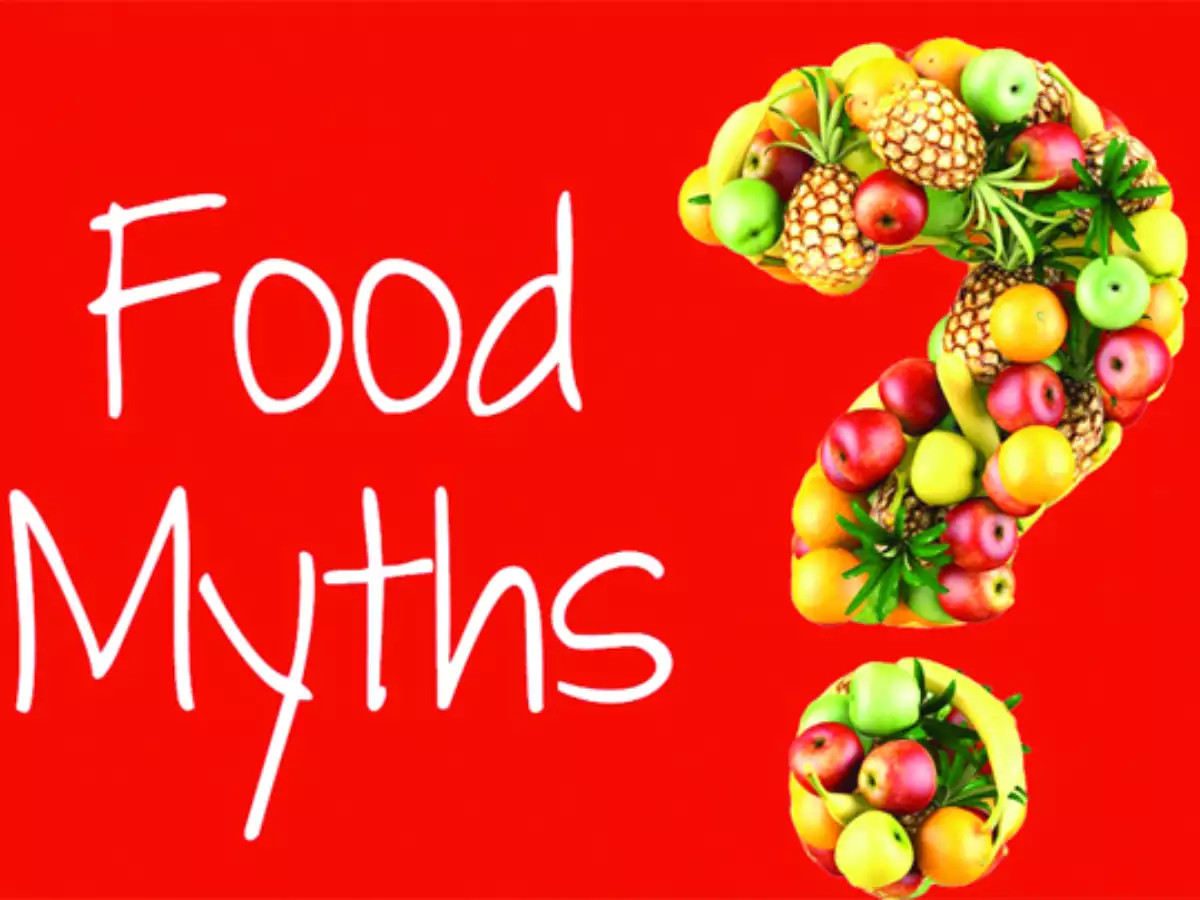**

In [ ]:
#Relation Between Fat & Saturated Fat
fig  = px.scatter(nutrients, x = 'Fat', y = 'Sat.Fat', trendline = 'lowess', color = 'Fat',
                 color_discrete_map={'Fat':'#cd0000', 'Sat.Fat':'#3399ff'},hover_name='Food' ,template = 'plotly_white',
                  title = 'Relation Between Saturated Fat and Fat')
fig.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



**Fat and Saturated **Fat mostly have linear trend that saturated fat slightly less amount than Fat. So, does it means fat and saturated fat have same impact?

**Based on National Health Service (NHS) information**, average daily reference intakes for adults are Fat (70 gram) and Saturated Fat (20gram). meaning , normally you ought to stop consume at 20gram saturated fat before considering 70gram fat. But, anyway, fat remains an important component of our diet (Please keep your diet balance). So. it's clear, within the same amount SATURATED FAT HAS MORE DANGEROUS IMPACT FOR BODY THAN FAT

**Fat and Saturated Fat** mostly have linear trend that saturated fat slightly less amount than Fat. So, does it means fat and saturated fat have same impact?

Based on National Health Service (NHS) information, average daily reference intakes for adults are Fat (70 gram) and Saturated Fat (20gram). That means, normally you should stop consume at 20gram saturated fat before considering 70gram fat. But, anyway, fat is still an essential component of our diet (Please keep your diet balance). So. it is clear, in the same amount SATURATED FAT HAS MORE DANGEROUS IMPACT FOR BODY THAN FAT

In [ ]:
#Food Comparison based on Protein Content
fig = go.Figure(go.Pie(values=category_dist['Protein'].values, text=category_dist.index, labels=category_dist.index,
                marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))))
fig.update_layout(title_text="Food Comparison based on Protein Content",height=600, width=800)
fig.show()

*[Fish, Seafood] category has higher protein content (28.2%) than [Meat, Poultry] (22.9%). While, [Vegetables], [Soups], and [Desserts] have a quite similar average protein content (around 2.5%), it means THERE IS NO DIFFERENCE MEANING IN PROTEIN INTAKE FROM THEM. But, since [Fish, Seafood] category actually can be included in the broad meats category in real life, we also could say MEATS CONTRIBUTE LARGEST PROTEIN SOURCE IN MOST COMMON FOOD.*

we already knew that meat was protein source, how about we find Top 10 Meat with High Protein Content, so you'll know what kind of food you need to get largest protein source. Check it out!

In [ ]:
#Top 10 Meats High Protein Content
meats = nutrients[nutrients['Category'].isin(['Fish, Seafood', 'Meat, Poultry'])]
meats_protein=meats.sort_values(by='Protein', ascending= False)
meats_protein=meats_protein.head(10)

fig = go.Figure(go.Pie(values=meats_protein['Protein'].values, text=meats_protein['Food'],
               marker = {"colors": ['#100b','#f00560'],"line": {"color": '#FFFFFF', "width" : 2.5}}))
fig.update_layout(title_text="Meat with High Protein Content",height=500, width=800)
fig.show()

 **Oyster really was super protein food, not gonna lie.**

*Conclusion*:

 Based on data, we could say THE STATEMENT IS HALF TRUE. It's true [Meat, Poultry] has quite high protein content, and [Fish, Seafood] are included in the broad meats category in real life. But, for common people, the statement could lead to misunderstanding, while meats associated with livestocks and seafoods are fish only. In other hand, the fact about [Fish, Seafood] category DOMINATE TOP 10 MEAT WITH HIGH PROTEIN CONTENT can't ignore easily.

In [ ]:
miscellaneous = nutrients[nutrients['Category'].isin(['Fats, Oils, Shortenings'])]

#Top 10 High Calories
miscellaneous_calories=miscellaneous.sort_values(by=['Calories'], ascending= False)
#miscellaneous_calories=miscellaneous_calories.head(10)

fig = go.Figure(data=[go.Scatter(x=miscellaneous_calories['Food'], y=miscellaneous_calories['Calories'], 
                mode='markers', marker_color=["blue", "purple", "pink", "teal", "silver","yellow", "lightsalmon", "tan", "teal", "silver"], 
                marker_size=miscellaneous_calories['Calories']*5)])
fig.update_layout(title='Fats, Oils, Shortenings with High Calories Content')
fig.show()

In [ ]:
#Let's try to open table value of [Fats, oils, Shortening] category to make sure.
display(miscellaneous)

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
28,Yolks,2,34,3.529412,0.176471,0.294118,0.235294,0.000000,0.000000,"Fats, Oils, Shortenings"
29,Butter,1T.,14,7.142857,0.000000,0.785714,0.714286,0.000000,0.000000,"Fats, Oils, Shortenings"
30,Butter,1/2 cup,112,1.008929,1.017857,1.026786,1.035714,1.044643,1.053571,"Fats, Oils, Shortenings"
31,Butter,1/4 lb.,112,1.008929,1.017857,1.026786,1.035714,1.044643,1.053571,"Fats, Oils, Shortenings"
32,Hydrogenated cooking fat,1/2 cup,100,6.650000,0.000000,1.000000,0.880000,0.000000,0.000000,"Fats, Oils, Shortenings"
33,Lard,1/2 cup,110,9.018182,0.000000,1.000000,0.836364,0.000000,0.000000,"Fats, Oils, Shortenings"
34,Margarine,1/2 cup,112,7.196429,0.000000,0.812500,0.678571,0.000000,0.000000,"Fats, Oils, Shortenings"
35,Margarine 2 pat or,1 T.,14,7.142857,0.000000,0.785714,0.642857,0.000000,0.000000,"Fats, Oils, Shortenings"
36,Mayonnaise,1 T.,15,7.333333,0.000000,0.800000,0.333333,0.000000,0.000000,"Fats, Oils, Shortenings"
37,Corn oil,1 T.,14,8.928571,0.000000,1.000000,0.357143,0.000000,0.000000,"Fats, Oils, Shortenings"
